In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import statsmodels.api as sm

In [8]:
from sklearn.feature_selection import mutual_info_regression

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import StackingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn.linear_model import Lasso
# from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

In [9]:
#Load the data
df = pd.read_csv("AirBNB_modified.csv")

In [10]:
#Analyze the data
df.describe()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Day_Of_Week,Year
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,40.728941,-73.952170,152.740309,7.012444,23.273098,1.372566,7.148369,112.801425,15.650170,2018.317635
std,1.098289e+07,7.862389e+07,0.054528,0.046159,240.232386,20.019757,44.549898,1.497816,32.964600,131.610962,9.918687,1.161725
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,1.000000,2011.000000
25%,9.475980e+06,7.818669e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,0.280000,1.000000,0.000000,6.000000,2018.000000
50%,1.969114e+07,3.079133e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.220000,1.000000,45.000000,16.000000,2019.000000
75%,2.915765e+07,1.074344e+08,40.763107,-73.936280,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000,24.000000,2019.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,31.000000,2019.000000


In [11]:
df.corr()

/var/folders/40/hpv0h46j20gg7j7wlhwpz6f80000gq/T/ipykernel_14131/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Day_Of_Week,Year
id,1.000000,0.588221,-0.003116,0.091076,0.010564,-0.012038,-0.320020,0.253101,0.133224,0.085616,-0.037469,0.430520
host_id,0.588221,1.000000,0.020193,0.127198,0.015328,-0.017027,-0.140273,0.254862,0.154954,0.203743,-0.030462,0.271870
latitude,-0.003116,0.020193,1.000000,0.084819,0.033944,0.025893,-0.015198,-0.009120,0.019548,-0.010775,-0.000345,-0.014996
longitude,0.091076,0.127198,0.084819,1.000000,-0.149954,-0.062893,0.059151,0.131890,-0.114746,0.082754,-0.013109,0.088675
price,0.010564,0.015328,0.033944,-0.149954,1.000000,0.042804,-0.047949,-0.022458,0.057460,0.081817,-0.003693,-0.005947
minimum_nights,-0.012038,-0.017027,0.025893,-0.062893,0.042804,1.000000,-0.081610,-0.094333,0.131313,0.145953,0.003028,-0.014768
number_of_reviews,-0.320020,-0.140273,-0.015198,0.059151,-0.047949,-0.081610,1.000000,0.530182,-0.072408,0.171855,0.029560,0.224396
reviews_per_month,0.253101,0.254862,-0.009120,0.131890,-0.022458,-0.094333,0.530182,1.000000,-0.006818,0.163111,-0.018541,0.383961
calculated_host_listings_count,0.133224,0.154954,0.019548,-0.114746,0.057460,0.131313,-0.072408,-0.006818,1.000000,0.225784,0.016579,0.066664
availability_365,0.085616,0.203743,-0.010775,0.082754,0.081817,0.145953,0.171855,0.163111,0.225784,1.000000,-0.002485,0.289485


In [12]:
df[df['price'] < 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Day_Of_Week,Month,Year,Seasons


<h2> DATA CLEANING <h2>


In [13]:
#Replace negative prices 
df["price"].replace(0, np.nan, inplace=True)
df.dropna(subset=["price"], inplace=True)



/var/folders/40/hpv0h46j20gg7j7wlhwpz6f80000gq/T/ipykernel_14131/2491388549.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


([<matplotlib.axis.YTick at 0x7f85517094e0>,
 [Text(0, 0, 'id'),
  Text(0, 1, 'host_id'),
  Text(0, 2, 'latitude'),
  Text(0, 3, 'longitude'),
  Text(0, 4, 'price'),
  Text(0, 5, 'minimum_nights'),
  Text(0, 6, 'number_of_reviews'),
  Text(0, 7, 'reviews_per_month'),
  Text(0, 8, 'calculated_host_listings_count'),
  Text(0, 9, 'availability_365'),
  Text(0, 10, 'Day_Of_Week'),
  Text(0, 11, 'Year')])

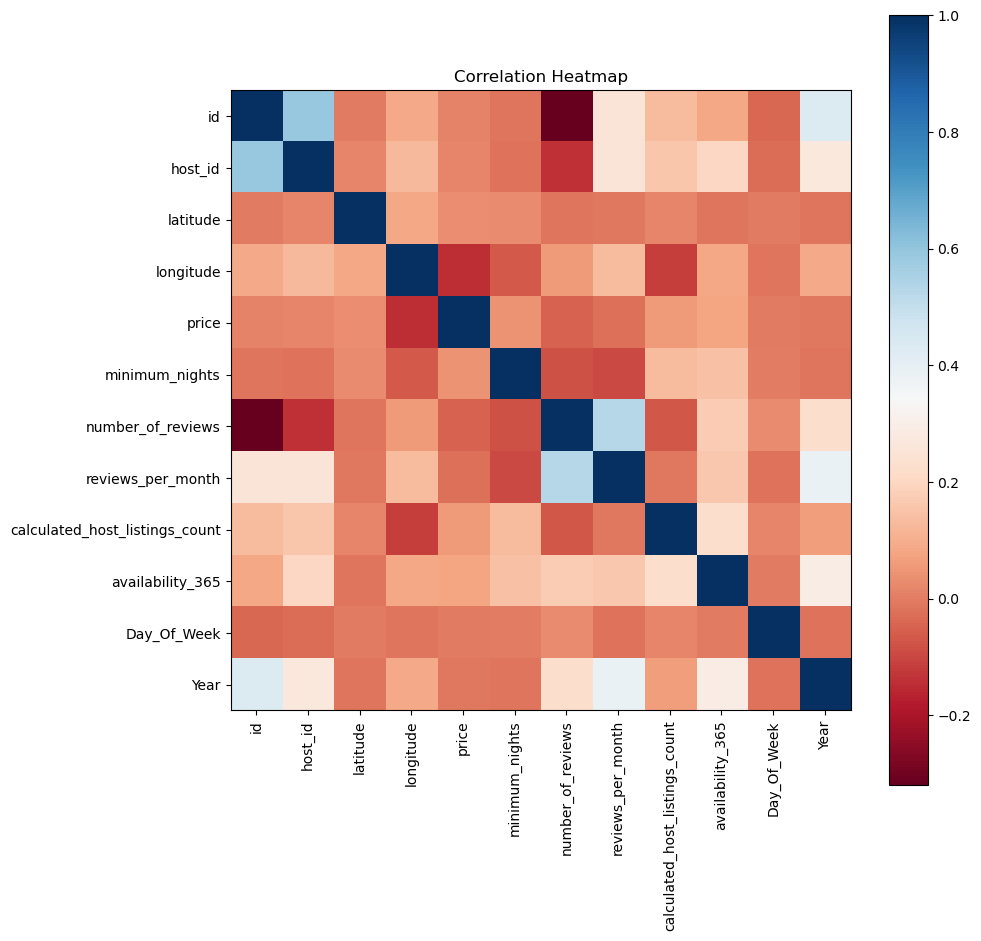

In [14]:
#Get the correlation matrix
corr = df.corr()
#Plot the heatmap
plt.figure(figsize=(10, 10))
plt.title("Correlation Heatmap")
plt.imshow(corr, cmap="RdBu")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

In [15]:
df_copy=df.drop(["id","name","host_id","host_name","latitude","longitude","number_of_reviews","last_review","reviews_per_month","calculated_host_listings_count","Year","neighbourhood_group","group"],axis=1)
df_copy
#Impute missing values
if df_copy.empty:
    df_copy = df_copy.median()
else:
    df_copy = df_copy

KeyError: "['group'] not found in axis"

In [ ]:
from sklearn.preprocessing import LabelEncoder

#Create a LabelEncoder object
le = LabelEncoder()

#Fit the LabelEncoder object to the room_type column
le.fit(df_copy["room_type"])

#Transform the room_type column
df_copy["room_type"] = le.transform(df_copy["room_type"])

#Create a LabelEncoder object
le = LabelEncoder()

#Fit the LabelEncoder object to the room_type column
le.fit(df_copy["Seasons"])

#Transform the room_type column
df_copy["Seasons"] = le.transform(df_copy["Seasons"])

#Create a LabelEncoder object
le = LabelEncoder()

#Fit the LabelEncoder object to the room_type column
le.fit(df_copy["Month"])

#Transform the room_type column
df_copy["Month"] = le.transform(df_copy["Month"])

In [ ]:
#Create a LabelEncoder object
le = LabelEncoder()

#Fit the LabelEncoder object to the room_type column
le.fit(df_copy["neighbourhood"])

#Transform the room_type column
df_copy["neighbourhood"] = le.transform(df_copy["neighbourhood"])

df_copy.tail(1000)
df_copy.isnull().sum()

In [ ]:
#Transform the data
df_copy["price"] = df_copy["price"].astype(float)
from sklearn.tree import DecisionTreeRegressor


In [ ]:
#Transform the data
df_copy["price"] = df_copy["price"].astype(float)
from sklearn.tree import DecisionTreeRegressor


In [ ]:
#Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(df_copy, df_copy["price"], test_size=0.25)


In [ ]:

#Create the decision tree model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

In [ ]:
#Create the decision tree model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

In [ ]:
#Print the score
print(score)

In [ ]:
score = model.score(X_train,y_train )

In [ ]:
print(score)

In [ ]:
sns.distplot(df['pee'])

In [ ]:
sns.distplot(df['price'])

In [ ]:
df2 = df[df['price'] > 1]
df2

In [ ]:
np.array(10**df['pee'])

In [ ]:
print("Skewness: %f" % df['pee'].skew())
print("Kurtosis: %f" % df['pee'].kurt())